# Close Price Prediction of Dogecoin


## Introduction


Dogecoin is a cryptocurrency founded by software programmers Billy Markus and Jackson Palmer, who sought to create a payment system in response to the wild speculation in cryptocurrencies at the time. It was launched on December 6, 2013, and soon garnered an online following. On his Twitter account, Elon Musk routinely mentions or talks about Dogecoin, which has exploded in popularity in recent years.


Aim of this project is to analyze Dogecoin-USD price data from 2013 to 2021, and predict the closing price of Dogecoin using machine learning algorithms. Since the close price is a continuous value, this is a regression problem. Prediction of coin price with low error score can be very profitable in finance, delivering the opportunity to trade based on future price prediction.

After analyzing and exploring the Dogecoin data, another dataset containing Elon Musk's tweets were also observed briefly, in order to catch any correlations between his tweets and coin price. 

For the price prediction, 7 different machine learning models are used, hyperparameter tuning was done with methods such as grid search. Those models are compared and discussed. The lowest root mean squared error score obtained was 0.0029632.

### Problem Definition


End goal is to extensively analyze data, examine correlations between variables, analyze the distributions and predict closing price of data by using a machine learning model. Obtaining a low error score in the prediction of closing price would be very useful in cryptocoin investment areas. Investors could use this data in order to develop algprithms that trade coins based on the prediction for the day. And by many trade operations a day, significant amounts of profit can be made even considering the error margin. In order to obtain the lowest error score possible, goal is to try out different models such as decision tree, KNN, random forest in order to select the best performing model among them. Then implement it and calculate the error score by testing it. Also try out different boosting methods either.

### Utilized Datasets


# Dataset 1) 
Data obtained from [Dogecoin Historical Data](https://www.kaggle.com/dhruvildave/dogecoin-historical-data). Data is from 2013 to October 2021 and contains open, close, high, low prices and the volume for the day.

In [74]:
from os.path import join
from google.colab import drive
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive"

%matplotlib inline

Mounted at /content/drive


In [75]:
df = pd.read_csv(join(path_prefix, "DOGE-USD.csv"))

In [76]:
df

,Date,Open,High,Low,Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,5.391400e+05
...,...,...,...,...,...,...
2591,2021-10-21,0.254793,0.258261,0.242273,0.242391,1.742571e+09
2592,2021-10-22,0.242479,0.252772,0.236472,0.244221,1.829875e+09
2593,2021-10-23,0.244514,0.253140,0.241589,0.251733,1.502685e+09
2594,2021-10-24,0.251432,0.281935,0.246028,0.277048,5.278761e+09


**Data Shape**

Let's analyze number of rows and number of columns to understand the data shape.

In [77]:
n_rows, n_columns = df.shape
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 2596, number of columns: 6


**Data Types**

In [78]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [79]:
df.info

<bound method DataFrame.info of             Date      Open      High       Low     Close        Volume
0     2014-09-17  0.000293  0.000299  0.000260  0.000268  1.463600e+06
1     2014-09-18  0.000268  0.000325  0.000267  0.000298  2.215910e+06
2     2014-09-19  0.000298  0.000307  0.000275  0.000277  8.835630e+05
3     2014-09-20  0.000276  0.000310  0.000267  0.000292  9.930040e+05
4     2014-09-21  0.000293  0.000299  0.000284  0.000288  5.391400e+05
...          ...       ...       ...       ...       ...           ...
2591  2021-10-21  0.254793  0.258261  0.242273  0.242391  1.742571e+09
2592  2021-10-22  0.242479  0.252772  0.236472  0.244221  1.829875e+09
2593  2021-10-23  0.244514  0.253140  0.241589  0.251733  1.502685e+09
2594  2021-10-24  0.251432  0.281935  0.246028  0.277048  5.278761e+09
2595  2021-10-25  0.274789  0.278905  0.261085  0.264336  4.801954e+09

[2596 rows x 6 columns]>

**Null Values**

Looking for nan values and dropping rows with nan values since it affects the machine learning models' performance.

In [80]:
df.isnull().sum()

Date      0
Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

In [81]:
df=df.dropna()

Creating different dataframes for only the year 2021 and all years before 2021 in order to observe the pattern difference in two different periods of time given the information that Dogecoin has got popular around the start of 2021.

Also create 2 other dataframes for the last 135 and last 50 rows of the dataframe to visualize the coin price movements in a candlestick chart.

In [82]:
df_2021=df.tail(298)
df_before21=df.head(2592-298)
df_135 = df.tail(135)
df_50 = df.tail(50)

In [83]:
fig_last135 = go.Figure(
    data=[
        go.Candlestick(
            x=df_135["Date"],
            open=df_135["Open"],
            high=df_135["High"],
            low=df_135["Low"],
            close=df_135["Close"],
        )
    ]
)

fig_last50 = go.Figure(
    data=[
        go.Candlestick(
            x=df_50["Date"],
            open=df_50["Open"],
            high=df_50["High"],
            low=df_50["Low"],
            close=df_50["Close"],
        )
    ]
)

fig_before_2021 = go.Figure(
    data=[
        go.Candlestick(
            x=df_before21["Date"],
            open=df_before21["Open"],
            high=df_before21["High"],
            low=df_before21["Low"],
            close=df_before21["Close"],
        )
    ]
)

fig = go.Figure(
    data=[
        go.Candlestick(
            x=df["Date"],
            open=df["Open"],
            high=df["High"],
            low=df["Low"],
            close=df["Close"],
        )
    ]
)

fig2021 = go.Figure(
    data=[
        go.Candlestick(
            x=df_2021["Date"],
            open=df_2021["Open"],
            high=df_2021["High"],
            low=df_2021["Low"],
            close=df_2021["Close"],
        )
    ]
)

Cryptocurrency graphs are commonly represented as candlestick charts. Candlesticks are useful when trading as they show four price points (open, close, high, and low) which is our data. Below are candlestick charts of Jan-Oct 2021, June-Oct 2021 and  Sept-Oct 2021, to analyze data in different proportions.

In [84]:
fig2021.show()

In [85]:
fig_last135.show()

In [86]:
fig_last50.show()

Now let's plot the whole history of the coin to see if correlates with only 2021 graph.

In [87]:
fig.show()

Observing the charts above, we can observe that graph of all history doesn't correlate with 2021 movements. The coin price is very low and stable for the first 5 years. It only has a small movement in 2018, besides that it is very stable until 2021. Then in 2021 popularity of the coin increases with the tweets of Elon Musk.


Now let's observe the Elon Musk's tweets data to see if it is correlated with Dogecoin price data.


### Dataset 2)
 Data obtained from [All Elon Musk's Tweets](https://www.kaggle.com/andradaolteanu/all-elon-musks-tweets/version/7). This data contains all of Elon Musk's tweets from 2009 to 2021. The goal is to observe if there is a visible effect of Elon Musk's tweets to the price of Dogecoin.

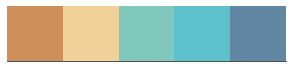

In [88]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# Color palette
my_colors = ["#ce8f5a", "#efd199", "#80c8bc", "#5ec0ca", "#6287a2"]
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'


In [89]:
tweets_df = pd.read_csv(join(path_prefix, "TweetsElonMusk.csv"))

**Number of Rows and Columns**

Showing number of rows and columns in order to understand the size of data.

In [90]:
n_rows, n_columns = tweets_df.shape
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 12562, number of columns: 36


**Data Types**

In [91]:
tweets_df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place              float64
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

**Null Values**

In [92]:
tweets_df.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              12562
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          12152
video                  0
thumbnail          11770
near               12562
geo                12562
source             12562
user_rt_id         12562
user_rt            12562
retweet_id         12562
reply_to               0
retweet_date       12562
translate          12562
trans_src          12562
trans_dest         12562
dtype: int64

We can see that there are many irrelavant features in the dataframe which we will not use. For simplicity; create a smaller df with the relevant features only. Also add a new feature; year, obtained from the date object for easier usage.

In [93]:
tweets = tweets_df[["id", "date", "time", "username","tweet", "mentions", "urls", "photos", "replies_count","retweets_count", "likes_count", "hashtags", "link"]]
tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Plot Elon Musk's twitter usage over the years**

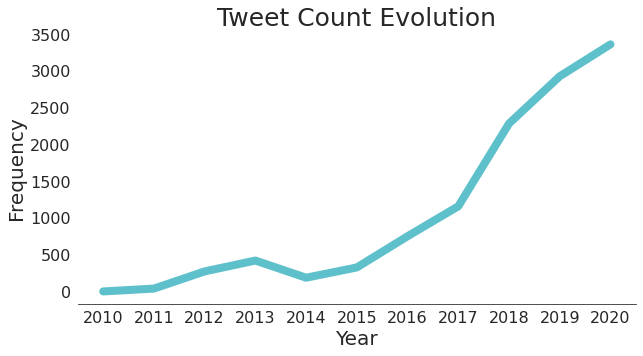

In [94]:
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8, color=my_colors[3])
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

As we can observe from this graph, Elon Musk's activity in twitter has started increasing after 2015 and reached the peak level during the start of 2021. Just where dogecoin has increased in price. Tweets about dogecoin will be analyzed in the data exploration part.

## Data Exploration


**Dataset 1)**

Plot of Dogecoin volume in 2021. As it can be seen on the plot, volume has peaked April 2020 and fell back again afterwards. We will try to observe some market manipulation during this times.

Text(0.5, 1.0, 'Date vs Volume of 2021')

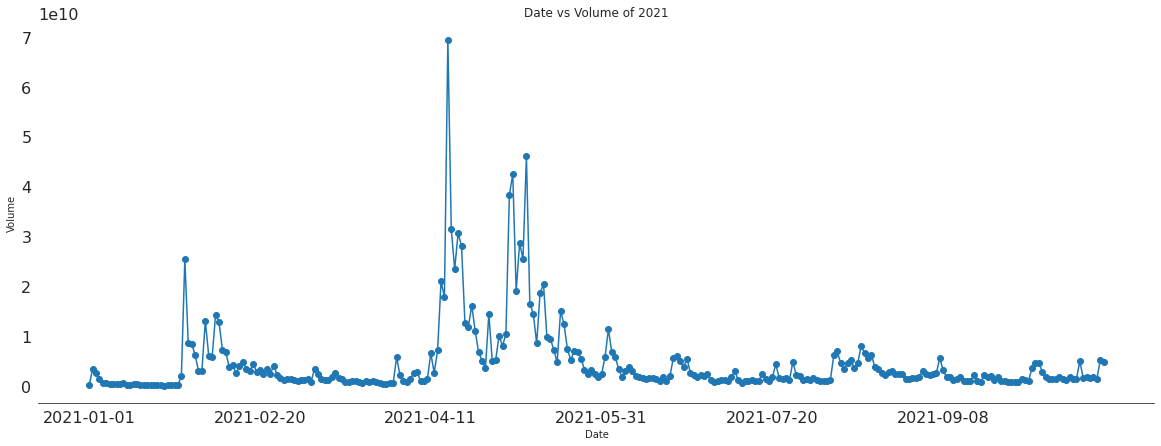

In [95]:
plt.figure(figsize=(20,7))
df_2021.groupby('Date')['Volume'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Volume of 2021")

In [96]:
df_2021.shape

(298, 6)

A weekly dataset will be created to analyze the year 2021 by weeks. Since our data is until October 2021, there are 42 weeks only. Mean prices for every week is imputted.

In [97]:
df.drop(df.tail(4).index,inplace=True) # drop last 4 rows
df_weekly=df_2021.groupby(np.arange(len(df_2021))//7).mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_weekly

,Open,High,Low,Close,Volume
0,0.008700,0.010897,0.007901,0.009424,1.383963e+09
1,0.009305,0.009939,0.008388,0.009259,4.255145e+08
2,0.009203,0.009406,0.008719,0.009028,2.574254e+08
3,0.008301,0.009421,0.007929,0.008929,4.534104e+08
4,0.037059,0.049759,0.030226,0.038477,9.755100e+09
5,0.065365,0.074267,0.058546,0.067826,8.162878e+09
6,0.061152,0.064440,0.054408,0.059726,3.810848e+09
7,0.054672,0.058589,0.049299,0.053335,2.977373e+09
8,0.050038,0.051657,0.048340,0.050017,1.356265e+09
9,0.054111,0.056418,0.052146,0.054941,1.769605e+09


In [99]:
df_weekly_volume=df_weekly[['Volume']]
df_weekly_prices=df_weekly[['Open','High','Low','Close']]

Plot of open high low close prices weekly for 2021.

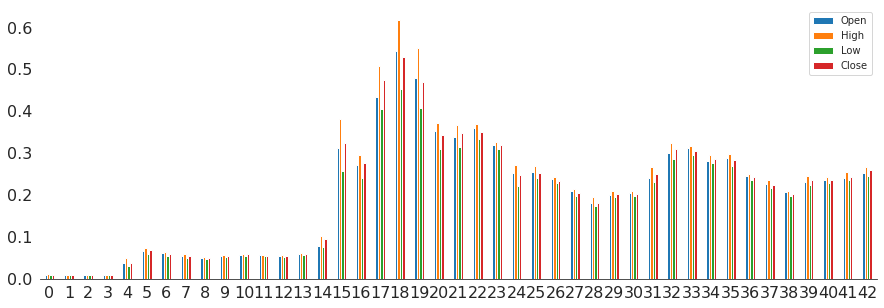

In [100]:
ax = df_weekly_prices.plot.bar(rot=0,figsize=(15,5))

We can suggest that the price graph looks like a normal distribution graph for both 2021 and all times graphs.

Weekly plot of volume.

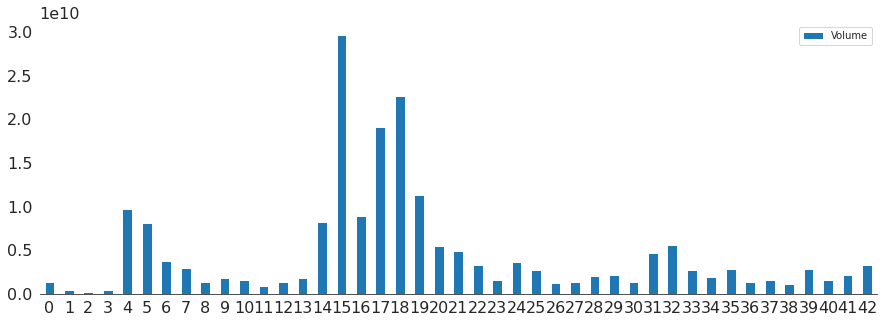

In [101]:
ax = df_weekly_volume.plot.bar(rot=0,figsize=(15,5))

We can create a new feature volatility to calculate the difference between high and low values for each day.

In [102]:
newcol=[]
for index, row in df_2021.iterrows():
    temp=row['High']-row['Low']
    newcol.append(temp)
df_2021['Volatility']=newcol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Plot of daily volatility throughout 2021

Text(0.5, 1.0, 'Date vs Volatility of 2021')

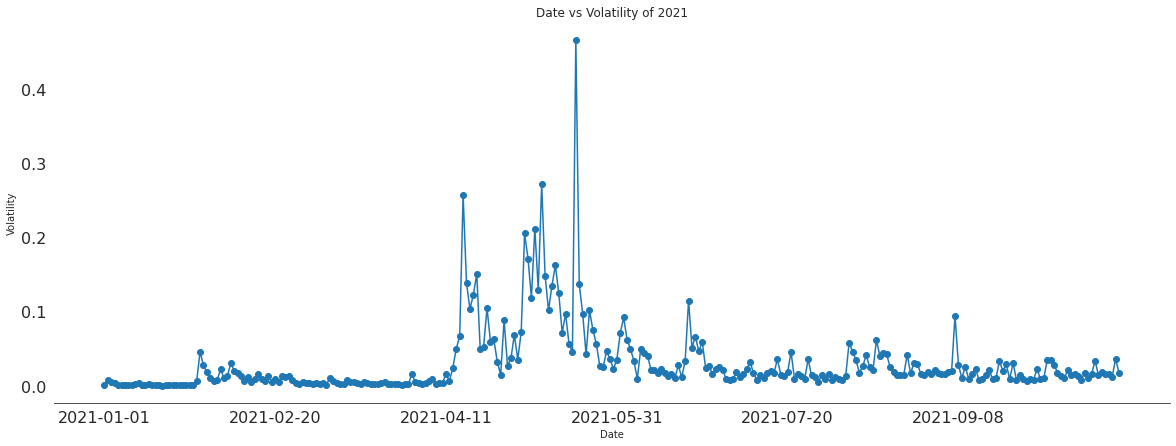

In [103]:
plt.figure(figsize=(20,7))
df_2021.groupby('Date')['Volatility'].mean().plot(linewidth = 1.5, marker ='o')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title("Date vs Volatility of 2021")

Bar plot of opening prices.

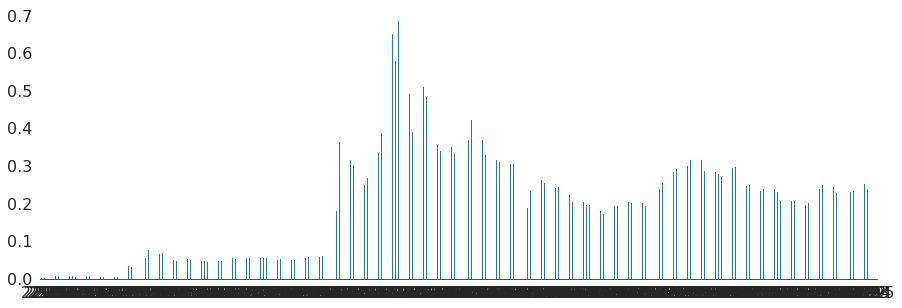

In [104]:
ax = df_2021['Open'].plot.bar(rot=0,figsize=(15,5))

As we can see from this bar plot and the candlestick graphs in data utilization part, dogecoin price is **normally distributed**. Both volume and price graphs correlates with normal distribution graphs.

Observe the frequency of each price in order to examine price distributions from another angle.

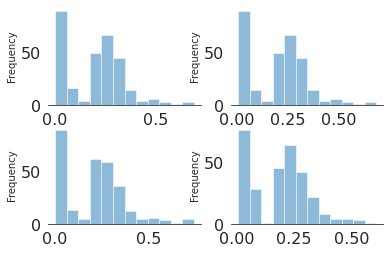

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = df_2021['Open'].plot.hist(bins=12, alpha=0.5,ax=axes[0,0])
ax4 = df_2021['Close'].plot.hist(bins=12, alpha=0.5,ax=axes[0,1])
ax2 = df_2021['High'].plot.hist(bins=12, alpha=0.5,ax=axes[1,0])
ax3 = df_2021['Low'].plot.hist(bins=12, alpha=0.5,ax=axes[1,1])

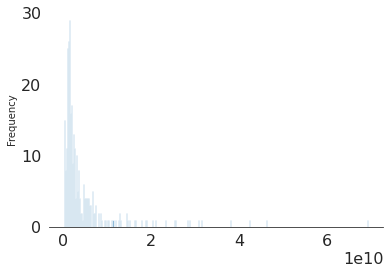

In [106]:
ax = df_2021['Volume'].plot.hist(bins=300, alpha=0.5)

**Dataset 2)**

Showing some statistics about Elon Musk's tweets about Dogecoin such as the most liked dogecoin and bitcoin tweets.

In [107]:
dogecoin_tweets = tweets[tweets["tweet"].str.contains("Dogecoin")].reset_index(drop = True)
# Information
print( color.BOLD + "% of tweets about Dogecoin:" + color.END, "{:.3}%".format(dogecoin_tweets.shape[0]/tweets.shape[0]*100))
   
top = dogecoin_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked DOGECOIN tweets:" + color.END)
for k, text in enumerate(top):
    print(f"{k+1}. {text}")

% of tweets about Dogecoin: 0.103%

 Most liked DOGECOIN tweets:
1. Dogecoin is the people’s crypto
2. Bought some Dogecoin for lil X, so he can be a toddler hodler
3. SpaceX is going to put a literal Dogecoin on the literal moon
4. If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.
5. Dogecoin rulz  https://t.co/flWWUgAgLU
6. Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.
7. @Dogecoinrich 🤣🤣


In [108]:
bitcoin_tweets = tweets[tweets["tweet"].str.contains("Bitcoin")].reset_index(drop = True)
# Information
print( color.BOLD + "% of tweets about Bitcoin:" + color.END, "{:.3}%".format(bitcoin_tweets.shape[0]/tweets.shape[0]*100))
   
top = bitcoin_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked Bitcoin tweets:" + color.END)
for k, text in enumerate(top):
    print(f"{k+1}. {text}")

% of tweets about Bitcoin: 0.111%

 Most liked Bitcoin tweets:
1. You can now buy a Tesla with Bitcoin
2. BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!
3. Bitcoin is my safe word
4. Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.  Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.
5. Pay by Bitcoin capability available outside US later this year
6. Bitcoin is almost as bs as fiat money
7. Bitcoin is *not* my safe word


As we can see he has posted many tweets about Dogecoin, actually 1% of his all time tweet's  are about dogecoin. Considering all those tweets were posted after 2020 (referring to graph at data utilization part), we can conclude that it is highly effective on dogecoin prices.

### Statistical Tests For Dataset 1)

**Correlation observations between different features:**

In [109]:
from scipy.stats import pearsonr
column_1 = df["Open"]
column_2 = df["Close"]
corr, _ = pearsonr(column_1, column_2)
print('Pearsons correlation between open and close: %.3f' % corr)

Pearsons correlation between open and close: 0.992


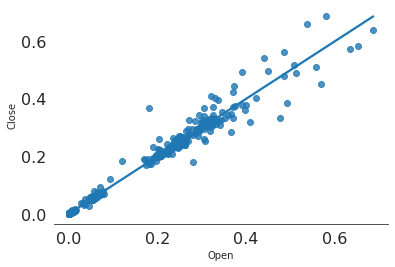

In [110]:
sns.regplot(x = column_1,
            y = column_2, 
            ci = None,
            data = df)

In [111]:
column_1 = df["High"]
column_2 = df["Low"]
corr, _ = pearsonr(column_1, column_2)
print('Pearsons correlation between high and low: %.3f' % corr)

Pearsons correlation between high and low: 0.987


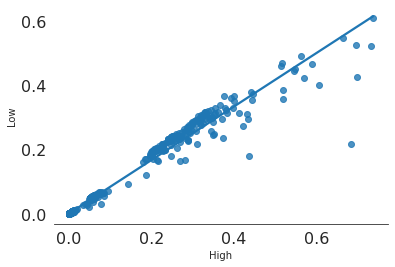

In [112]:
sns.regplot(x = column_1,
            y = column_2, 
            ci = None,
            data = df)

In [113]:
column_1 = df["High"]
column_2 = df["Close"]
corr, _ = pearsonr(column_1, column_2)
print('Pearsons correlation between high and close: %.3f' % corr)

Pearsons correlation between high and close: 0.995


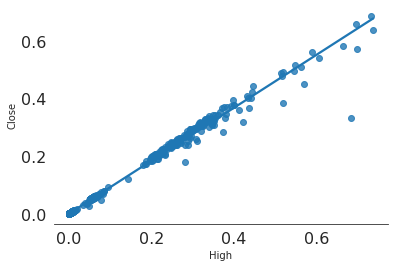

In [114]:
sns.regplot(x = column_1,
            y = column_2, 
            ci = None,
            data = df)

In [115]:
column_1 = df["Volume"]
column_2 = df["Close"]
corr, _ = pearsonr(column_1, column_2)
print('Pearsons correlation between volume and close: %.3f' % corr)

Pearsons correlation between volume and close: 0.645


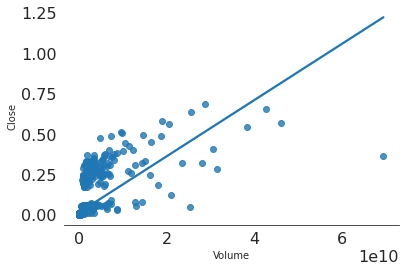

In [116]:
sns.regplot(x = column_1,
            y = column_2, 
            ci = None,
            data = df)

We can see that the target value close is correlated highly with open, high, low and volume but it has the highest correlation with open and high with pearson correlation values of 0.99.

**Hypothesis Testing**

*Hypothesis Test*: We want to test whether volume has an effect on closing price

*Null Hypothesis ($H_0$)*: `Volume` column has no effect on `Close`

*Alternative Hypothesis ($H_A$)*: `Volume` column has effect on `Close`

*Significance level*: As most of hypothesis tests assume significance level as `0.05`, we are setting it as `0.05` for our test too.

In [117]:
from scipy import stats

In [118]:
mean_vol =df_2021['Volume'].mean()
mean_vol

4598156257.171141

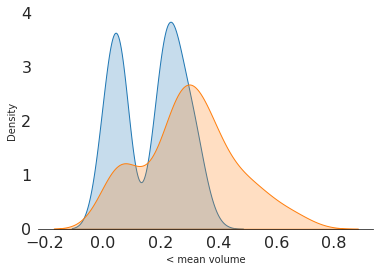

In [119]:
#checking the passenger count whether it is 1 passenger or more
less = df_2021[(df_2021["Volume"] < mean_vol) ]
more = df_2021[(df_2021["Volume"] >= mean_vol) ]

ax = sns.kdeplot(less["Close"].rename("< mean volume"),shade = True)
sns.kdeplot(more["Close"].rename(">= mean volume"),shade = True)

plt.show()

In [120]:
less_values =  less["Close"].values
more_values = more["Close"].values

In [121]:
_, p_value = stats.ttest_ind(a=less_values, b=more_values, equal_var=False)
p_value

3.913007970689199e-10

Since p value is less than 0.05, we reject null hypothesis and accept alternative hypothesis. Thus 'Volume' has an effect on 'Close'.

## Machine Learning Models


We are going to try Linear regression, Decision Tree regressor, Bayesian ridge, KNN Regressor, Random Forest, Catboost and XGBoost .

### Implementation

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge

In [123]:
X=df[['Open','High','Low','Volume']].copy()
y=df[['Close']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0,shuffle=True)

**Linear Regression**

In [124]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 0.00296360925963675


For testing; we used MAE, MSE, RMSE and R2 metrics. MAE is more robust to data with outliers, which in our case is not that important. RMSE is widely used than MSE to evaluate the performance of the regression models, therefore we are going to take RMSE as the main metric for model comparisions. R2 is used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable. 

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

**Result**: Best score obtained from Decision Tree Regressor is: 0.00296

**Decision Tree Regressor**

In [140]:
dtr = DecisionTreeRegressor(max_depth=25, random_state=1,min_samples_split=10)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 0.005955377382969452


For hyperparameter tuning; first we manuelly tried parameters max_depth=2,5,10,20,25 random_state=1,5,10 min_samples_split=5,10,15 and obtained the best results with parameters max_depth=25, random_state=1,min_samples_split=10.

Then we performed grid searched and searched for all pairs of max_depth=[1,30], min_samples_split=10,20,30,30,50,60 and obtained the best parameters as 'max_depth': 28, 'min_samples_split': 10.

In [141]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeRegressor()
grids = GridSearchCV(model,param_grid = {'max_depth': range(1, 50),'min_samples_split': range(10, 70, 10)},cv=5, n_jobs=1, scoring='neg_mean_squared_error')
grids.fit(X_train, y_train)

print("best parameters are:",grids.best_params_)

best parameters are: {'max_depth': 28, 'min_samples_split': 10}


Let's plot a chart of rmse for different max_depth values to visualize which parameter minimizes the score.

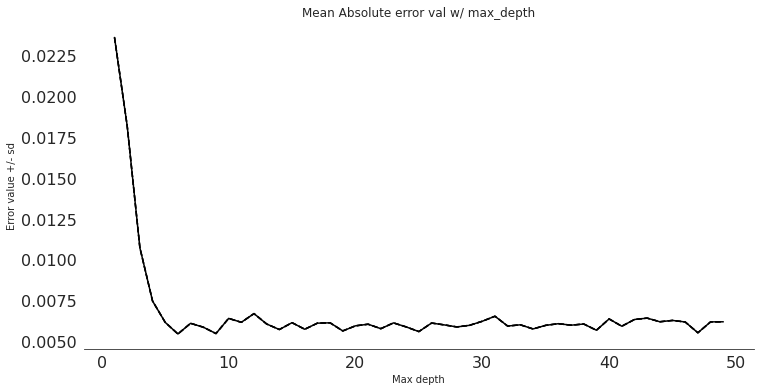

In [142]:
#DETERMINING BEST MAX_DEPTH VALUE BY ERROR VALUES

error_list = []
error_SD_list = []
error_dict={}
for depth in range (1, 50):
  model = DecisionTreeRegressor(max_depth=depth)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  error_list.append(error.mean())
  error_SD_list.append(error.std())
  error_dict[depth]=error

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error_list, color='black', linestyle='solid')
plt.plot(range(1, 50), np.array(error_list) + np.array(error_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 50), np.array(error_list) - np.array(error_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 50), np.array(error_list) + np.array(error_SD_list),
                 np.array(error_list) - np.array(error_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('Mean Absolute error val w/ max_depth')  
plt.xlabel('Max depth')  
plt.ylabel('Error value +/- sd') 
plt.show()

Print the dict values to observe scores for different depths. Keys of the dictionary represent depth, values represent the rmse for respective depth.

In [143]:
dict(sorted(error_dict.items(), key=lambda item: item[1]))

{1: 0.02360711201470071,
 2: 0.01819467356098581,
 3: 0.01074118073684378,
 4: 0.007477596326739775,
 5: 0.006170514424047426,
 6: 0.005461981225271216,
 7: 0.006114693283828012,
 8: 0.005877538550371651,
 9: 0.005487859763349858,
 10: 0.006415083276729161,
 11: 0.006176552680488714,
 12: 0.006707500928082162,
 13: 0.0060706828754000415,
 14: 0.005734203193954105,
 15: 0.006153247299619685,
 16: 0.005750518601947114,
 17: 0.006123918214220645,
 18: 0.0061443121453364745,
 19: 0.005648437534554831,
 20: 0.005960303406019545,
 21: 0.00605882617020911,
 22: 0.005786021087884154,
 23: 0.006140317826750785,
 24: 0.005893531953757557,
 25: 0.005608046949417645,
 26: 0.006130304725462429,
 27: 0.006017983302963627,
 28: 0.005892445996070077,
 29: 0.005992438161202006,
 30: 0.006239810473343178,
 31: 0.006547760834805049,
 32: 0.005945869731088407,
 33: 0.006023298465896105,
 34: 0.00577014596869091,
 35: 0.005989535338685218,
 36: 0.006091887146508171,
 37: 0.00599980239507292,
 38: 0.0060723

RMSE with max_depth=6, random_state=1

In [149]:
dtr = DecisionTreeRegressor(max_depth=6, random_state=1)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Root Mean Squared Error: 0.00552045406508848


In [150]:
df_tree=pd.DataFrame({'Actual':y_test['Close'], 'Predicted':pred})
df_tree.head(100)

,Actual,Predicted
2403,0.365870,0.396590
812,0.000214,0.000235
2530,0.316797,0.328325
443,0.000129,0.000139
1544,0.002102,0.002211
...,...,...
53,0.000219,0.000235
621,0.000238,0.000235
2027,0.001865,0.001805
1018,0.002645,0.002703


Here we can see the comparision of actual Dogecoin close price for the day and the price predicted by the decision tree regressor. From this table we can observe that the model predicted very succesfully for some days whereas had some significant error margins on others. This is caused by the unexpected manupilations in the market such as sudden tweets from Elon Musk that manipulate the coin prices.

**Result:** Best score obtained from Decision Tree Regressor is: 0.00552

**Bayesian Ridge**

In [160]:
model = BayesianRidge()
model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)
  
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['Close'], y_pred)))
#print(f"r2 Score Of Test Set : {r2_score(y_test, y_pred)}")

Root Mean Squared Error: 0.0029632331716082094


**Result:** Best score obtained from Bayesian Ridge is: 0.00296

**KNN Regressor**

Since its a regression task, kNN takes the mean of the nearest k neighbors.

In [192]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=18)
model.fit(X_train,y_train)
pred=model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(y_test['Close'], pred))
 
print(score)

0.036634996938206994


**Result:** Best score obtained from KNN Regressor is: 0.03663

**Random Forest**

In [159]:
from sklearn.ensemble import RandomForestRegressor

max_depths=[1,10,30]
accuracies=[]
max_leaf=[5,1000,10000]
for k in max_depths:
  for i in max_leaf:
    tree=RandomForestRegressor(max_depth=k,random_state=42,max_leaf_nodes=i)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test['Close'], pred))
    accuracies.append(score)

print("MSE for different max_depth and leaf node variables :")
print (accuracies)

MSE for different max_depth and leaf node variables :
[0.02362584983455819, 0.02362584983455819, 0.02362584983455819, 0.008712450218767634, 0.004821047639755109, 0.004821047639755109, 0.008712450218767634, 0.0048218306894165265, 0.004821830690148221]


In [153]:
import warnings
warnings.filterwarnings('ignore')

Apply grid search with some parameters to find the best performing one among them.

In [155]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
grids = GridSearchCV(model,param_grid = {'max_depth': range(1, 50,5),'max_leaf_nodes': range(10, 1000, 100)}, scoring='neg_mean_squared_error')
grids.fit(X_train, y_train)

print("best parameters are:",grids.best_params_)

best parameters are: {'max_depth': 21, 'max_leaf_nodes': 110}


Apply the best performing parameters obtained from grid search.

In [157]:
tree=RandomForestRegressor(max_depth=21,max_leaf_nodes=110)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test['Close'], pred)))

Root Mean Squared Error: 0.004715671714206262


**Result:** Best score obtained from Random Forest Regressor is: 0.00471

**Catboost**

Catboost is a library for gradient boosting decision trees. Catboost is suggested to be well performing with the default parameters, saving time from parameter tuning. Therefore firstly we are trying the model with the default parameters.

In [135]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [164]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor()
cbr.fit(X_train, y_train,plot=True,eval_set=(X_test,y_test))
cb_pred = cbr.predict(X_test, verbose=True)

cbr_mse = metrics.mean_squared_error(y_test, cb_pred)
cbr_mae = metrics.mean_absolute_error(y_test, cb_pred)
rmse_cbr = np.sqrt(cbr_mse)

#print('Mean Absolute Error:', cbr_mse)
#print('Mean Squared Error:', cbr_mse)
print('Root Mean Squared Error:', rmse_cbr)
#print(f"r2 Score Of Test Set : {r2_score(y_test, cb_pred)}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057083
0:	learn: 0.0751369	test: 0.0734027	best: 0.0734027 (0)	total: 5.37ms	remaining: 5.37s
1:	learn: 0.0713099	test: 0.0691954	best: 0.0691954 (1)	total: 11ms	remaining: 5.48s
2:	learn: 0.0678267	test: 0.0655060	best: 0.0655060 (2)	total: 12.4ms	remaining: 4.13s
3:	learn: 0.0645082	test: 0.0620501	best: 0.0620501 (3)	total: 14ms	remaining: 3.48s
4:	learn: 0.0613018	test: 0.0586490	best: 0.0586490 (4)	total: 15.7ms	remaining: 3.13s
5:	learn: 0.0582441	test: 0.0556371	best: 0.0556371 (5)	total: 18.2ms	remaining: 3.02s
6:	learn: 0.0554150	test: 0.0526973	best: 0.0526973 (6)	total: 19.8ms	remaining: 2.81s
7:	learn: 0.0526670	test: 0.0496709	best: 0.0496709 (7)	total: 21.2ms	remaining: 2.63s
8:	learn: 0.0500720	test: 0.0469280	best: 0.0469280 (8)	total: 22.2ms	remaining: 2.45s
9:	learn: 0.0476213	test: 0.0445438	best: 0.0445438 (9)	total: 23.7ms	remaining: 2.34s
10:	learn: 0.0454059	test: 0.0423652	best: 0.0423652 (10)	total: 25.9ms	remaining: 2.33s
11:	learn: 0.04

RMSE obtained with the default parameters is 0.00645. Now lets apply grid search with some parameters to see if we can improve the model.

In [161]:
# Grid Search for CatBoost
model = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X, 
                                       y=y, 
                                       plot=True)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
26:	learn: 0.0435927	test: 0.0462888	best: 0.0462888 (26)	total: 378ms	remaining: 13.6s
27:	learn: 0.0426594	test: 0.0451595	best: 0.0451595 (27)	total: 390ms	remaining: 13.6s
28:	learn: 0.0417730	test: 0.0441098	best: 0.0441098 (28)	total: 426ms	remaining: 14.3s
29:	learn: 0.0409513	test: 0.0431111	best: 0.0431111 (29)	total: 438ms	remaining: 14.2s
30:	learn: 0.0400766	test: 0.0420702	best: 0.0420702 (30)	total: 450ms	remaining: 14.1s
31:	learn: 0.0393134	test: 0.0411097	best: 0.0411097 (31)	total: 463ms	remaining: 14s
32:	learn: 0.0384990	test: 0.0401541	best: 0.0401541 (32)	total: 475ms	remaining: 13.9s
33:	learn: 0.0377167	test: 0.0392099	best: 0.0392099 (33)	total: 487ms	remaining: 13.8s
34:	learn: 0.0368920	test: 0.0382012	best: 0.0382012 (34)	total: 500ms	remaining: 13.8s
35:	learn: 0.0361082	test: 0.0373160	best: 0.0373160 (35)	total: 513ms	remaining: 13.7s
36:	learn: 0.0354130	test: 0.0365198	best: 0.0365198 (36)	total: 514ms	rema

In [162]:
print(grid_search_result)

{'params': {'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.1}, 'cv_results': defaultdict(<class 'list'>, {'iterations': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

In [163]:
cbr = CatBoostRegressor(depth= 10, l2_leaf_reg= 9, learning_rate= 0.1,use_best_model=True)
cbr.fit(X_train, y_train, plot=True,eval_set=(X_test,y_test))
cb_pred = cbr.predict(X_test, verbose=True)

cbr_mse = metrics.mean_squared_error(y_test, cb_pred)
cbr_mae = metrics.mean_absolute_error(y_test, cb_pred)
rmse_cbr = np.sqrt(cbr_mse)

#print('Mean Absolute Error:', cbr_mse)
#print('Mean Squared Error:', cbr_mse)
print('Root Mean Squared Error:', rmse_cbr)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0726901	test: 0.0707493	best: 0.0707493 (0)	total: 12.1ms	remaining: 12s
1:	learn: 0.0669095	test: 0.0644271	best: 0.0644271 (1)	total: 25.8ms	remaining: 12.9s
2:	learn: 0.0616661	test: 0.0586675	best: 0.0586675 (2)	total: 38.4ms	remaining: 12.8s
3:	learn: 0.0570204	test: 0.0535081	best: 0.0535081 (3)	total: 50.4ms	remaining: 12.6s
4:	learn: 0.0526419	test: 0.0488051	best: 0.0488051 (4)	total: 62.3ms	remaining: 12.4s
5:	learn: 0.0487353	test: 0.0445854	best: 0.0445854 (5)	total: 74.4ms	remaining: 12.3s
6:	learn: 0.0451908	test: 0.0411255	best: 0.0411255 (6)	total: 86.8ms	remaining: 12.3s
7:	learn: 0.0419651	test: 0.0376831	best: 0.0376831 (7)	total: 101ms	remaining: 12.5s
8:	learn: 0.0389100	test: 0.0345314	best: 0.0345314 (8)	total: 113ms	remaining: 12.5s
9:	learn: 0.0361674	test: 0.0318379	best: 0.0318379 (9)	total: 125ms	remaining: 12.4s
10:	learn: 0.0335942	test: 0.0290992	best: 0.0290992 (10)	total: 137ms	remaining: 12.3s
11:	learn: 0.0312258	test: 0.0267751	best: 0.02

After applying the parameters obtained from grid search, the rmse has actually increased. The defauly parameters performed better than the ones we got from grid search. It can also be noted that grid search was not time efficient since catboost is a slower model with respect to other simple regression models.

**Result:** Best score obtained from Catboost is: 0.00645

**XGBoost**

XGBoost is another gradient boosting method. Trying XGBoost also with default parameters.

In [168]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test['Close'], preds))
print("RMSE: %f" % (rmse))

[22:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.004631


**Result:** Best score obtained from XGBoost is: 0.00431

### Results & Discussion

Comparing the performences of the models above, the best rmse's in an increasing manner were as follows:

**Bayesian Ridge: 0.0029632 < Linear Regression: 0.0029636 < XGBoost: 0.00463 < Random Forest: 0.00471 < Decision Tree: 0.00552 < Catboost: 0.00646 < KNN: 0.366.**

Among the 7 models tried, Bayesian Ridge obtained the lowest rmse. Bayesian regression allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using probability distributors rather than point estimates. The output or response ‘y’ is assumed to drawn from a probability distribution rather than estimated as a single value. This might be indicating the fluctuation and the manipulation on the Dogecoin close prices, since we can observe an improvement in the models when we treat the data as a poorly distributed data. 

Also it can be noted that the gradient boosting algorithms performed well with their default parameters compared with the simple regression models having finely selected parameters using grid search . 

Those experiments were held in order to answer if a succesful prediction of Dogecoin close price could be made beforehand, in order to make profit by trading. By trying different machine learning models, the main goal was to minimize the erros score, which means getting closer to correctly predicting the close price.

## Conclusion

We obtained the lowest root mean squared error as 0.0029632. Considering the price is around 0.2 dollars after May 2021 (highest in 2021 is 0.6 and lowest is 0.004) the rmse is actually a small value. But while working on the project, for a couple of times we observed that even tough the models were predicting were accurate for some days, on some others it were predicting were off values. This was mainly due to very highly volatile prices caused by the manipulations in the market. Since the coin doesn't have an acutal project, it's price is highly influenced by tweets of Elon Musk and other people, making it open to risk. Therefore even though the models are well trained, the tweets and manipulations in the market cannot be forecasted, and this situation is lowering the accuracy of the models for this case. 

To summarize, we can say that the models perform successfuly assuming there aren't sudden manipulations from the outside of market. Besides that considering the sudden manipulations, we can train models to poorly distributed data and obtain low error scores.


## Future Work

In order to lower the error score even more, the gradient boosting algorithms are promising considering their performence with the default parameters. Bayesian ridge was useful since it worked well with poorly distributed data. Ways of training gradient boosting models in such cases can be researched and with parameter tuning on higher scaled grid searches, lower accuracy scores can be obtained.

## Work Division

We have divided sections among group members at the start of the project. Firstly Berfin has utilized the datasets and completed the dataset utilization part of the report. Emirhan and Aziz have worked on Data exploration part, plotted 6 graphs per person and worked on both datasets to gather different angles and statistics. At this part we did brainstorming sessions as a team in orde rto come up with new ideas on how to approach data. Besides that Beril and Sarp have worked on machine learning models. After a research period on best models for regression problems, Beril worked on Linear regression and Decision tree regressor, Sarp worked on Bayesian Riges and catboost. Even if we did a work division, we followed each others work all the time by brainstorming and talking through the working process. We divided work among members equally in order to move fast and efficient whereas everybody were able to follow each step and stay on track.

After the final report whole team focused on the machine learning part as well as adding the detailed explanations of previous parts. Beril has done extensive research on decision tree regressor and how to lower the error score with different methods such as grid search. Sarp and Emirhan focused on gradient boosting algorithms, how they work and how to implement. Since it was a new concept they worked together on this topic, they also applied grid search and tried different methods in order to enhance performance. Berfin and Emir firstly worked on the data exploration part in order to extend the prior work, then implemented KNN and Random forest. Whole group took part in explanations of different sections, made discussion sessions together so that everyone could follow each topic.

